# Bitcoin Price - Sentiment analysis

In [18]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk import word_tokenize
import requests
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from operator import itemgetter
import gensim.summarization
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud, STOPWORDS
from sklearn import linear_model
import statsmodels.api as sm
from textblob import TextBlob

In [19]:
# Data Source - https://www.kaggle.com/skularat/bitcoin-tweets
df = pd.read_csv("BitcoinTweets 2.csv")

In [20]:
df.head()

,table_key,tweet_id,text,date,favorites,retweets
0,1,892535404292968448,#bitcoin #bitcoinfork #hardfork #bitcoincash p...,1501631940,2,0
1,2,892535387280867328,#bitcoin : Whats going on with the digital cur...,1501631940,0,0
2,3,892535372139249664,"From the #Bitcoin White Paper: ""We define an e...",1501631940,1,0
3,4,892535371958898688,#Bitcoin : What's going on with the #digitalcu...,1501631940,5,0
4,5,892535353063731200,Found an app called @SlideCoin that pays #bitc...,1501631940,0,0


# Sentiment Vader Anlaysis

In [21]:
def clean_tweet(sentence):
    words = word_tokenize(sentence)
    lowercase_words = [word.lower() for word in words
                       if word not in stopwords.words() and word.isalpha()]
    temp_text = ' '.join(lowercase_words)
    return temp_text

In [22]:
def get_tweet_sentiment(tweet): 
    analysis = TextBlob(clean_tweet(tweet)) 
    if (analysis.sentiment.polarity > 0): 
        return 1
    elif (analysis.sentiment.polarity == 0): 
        return 0
    else:
        return -1

In [23]:
get_tweet_sentiment(df['text'][10])

0

In [24]:
def vader_comparison(sentence):
    sentence=clean_tweet(sentence)
    analyzer = SentimentIntensityAnalyzer()
    pos=compound=neu=neg=0
    vs = analyzer.polarity_scores(sentence)
    pos = vs['pos']
    neu = vs['neu']
    neg = vs['neg']
    compound = vs['compound']
    if (compound > 0):
        return 1
    elif (compound == 0):
        return 0
    else:
        return -1

In [25]:
vader_comparison(df['text'][1000])

0

In [26]:
get_tweet_sentiment(df['text'][1000])

1

In [27]:
df['score'] = 0.75*df['retweets'] + 0.25*df['favorites']
df = df.sort_values(['score'], ascending=False)
df = df[df['score'] > 2.5]
df1 = df.sample(n=100000)

In [28]:
df1['score'].describe()

count    100000.000000
mean         27.684575
std         204.729134
min           2.750000
25%           3.750000
50%           6.000000
75%          14.750000
max       49242.750000
Name: score, dtype: float64

In [ ]:
%%timeit
df1['sentiment_textblob'] = df1['text'].apply(lambda x: get_tweet_sentiment(x))

In [ ]:
%%timeit
df1['sentiment_vader'] = df1['text'].apply(lambda x: vader_comparison(x))

In [30]:
#The above two pieces of code a long time to compute so saved a new cleaned file "cleaned.csv" to use the data without having to compute everytime
df1 = pd.read_csv('cleaned.csv')

In [31]:
df1

,Unnamed: 0,table_key,tweet_id,text,date,favorites,retweets,score,sentiment_vader
0,5226652,5358842,913895212627451906,# Bitcoin Current bitcoin price is 0.00023961 ...,1506724560,12,5,6.75,0
1,1345503,1378655,922387557463347200,J'ai investi dans le # Bitcoin - Mon avis sur ...,1508749260,4,3,3.25,0
2,2365781,2422956,852934818329395201,Find one of 5 Byteball Easter Eggs each worth ...,1492190460,3,3,3.00,1
3,127702,130232,913682756609105920,Name of my @ openbazaar store Ready fir the Cr...,1506673860,4,3,3.25,1
4,5414150,5554459,968942863093587968,# celebrity # Gossip # GOESS # askvpmc # YouTu...,1519848900,3,3,3.00,-1
5,3877777,3971660,868196571187486720,Even the worlds largest # bitcoin exchange cou...,1495829160,0,4,3.00,0
6,5965384,6134760,833676388263657472,Top 6 # Bitcoin Trading Bots http://ow.ly/SAxz...,1487598900,4,46,35.50,1
7,3747885,3839083,956749000773812226,# Bitcoin Takes Davos Stage in # Currency Pane...,1516941660,6,2,3.00,0
8,2386370,2443867,951581515846246400,IBM and Stellar launch blockchain banking acro...,1515709680,10,6,7.00,0
9,318170,323677,915340689491349506,More on GS: Goldman Sachs exploring # bitcoin ...,1507069200,330,479,441.75,0


In [32]:
def combine():
    tweet1 = ''
    for i in range(0, len(df1)):
        tweet1 = tweet1 + '\n' + df1['text'][i]
    tweets = tweet1.replace('\n\n', ' ')
    tweets = tweets.replace('\n', ' ')
    tweets = ''.join(tweets)
    words = word_tokenize(tweets)
    lowercase = [word.lower() for word in words
                 if word not in stopwords.words() and word.isalpha()]
    tweets = ' '.join(lowercase)
    return tweets

In [33]:
def wordcloud():
    tweets = combine()
    print(tweets)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20, collocations=False).generate(tweets)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Drawing Word Cloud
wordcloud()

In [36]:
def draw_wordcloud(lda,topicnum,min_size=0,STOPWORDS=[]):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(topicnum,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(topicnum,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)

    text = ' '.join(word_list)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20, collocations=False).generate(text)

    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    return None

In [37]:
def topic():
    text = combine()
    new_text = [nltk.word_tokenize(text)]
    dictionary = corpora.Dictionary(new_text) 
    corpus = [dictionary.doc2bow(text) for text in new_text]
    lda = LdaModel(corpus, id2word=dictionary, num_topics=5, passes=10)
    lda.get_document_topics(corpus,minimum_probability=0.05)
    sorted(lda.get_document_topics(corpus,minimum_probability=0),key=itemgetter(1),reverse=True)
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(lda.print_topics(num_words=8))
    draw_wordcloud(lda,4)
    return lda, corpus, dictionary

[   (   0,
        '0.003*"bitcoin" + 0.001*"http" + 0.001*"blockchain" + 0.001*"https" + '
        '0.001*"cryptocurrency" + 0.001*"btc" + 0.000*"crypto" + '
        '0.000*"fintech"'),
    (   1,
        '0.004*"bitcoin" + 0.001*"blockchain" + 0.001*"https" + 0.001*"http" + '
        '0.001*"crypto" + 0.001*"btc" + 0.001*"cryptocurrency" + '
        '0.000*"fintech"'),
    (   2,
        '0.085*"bitcoin" + 0.025*"http" + 0.023*"https" + 0.019*"blockchain" + '
        '0.013*"btc" + 0.012*"cryptocurrency" + 0.011*"crypto" + '
        '0.008*"ethereum"'),
    (   3,
        '0.004*"bitcoin" + 0.002*"http" + 0.002*"https" + 0.001*"btc" + '
        '0.001*"blockchain" + 0.001*"cryptocurrency" + 0.001*"crypto" + '
        '0.001*"fintech"'),
    (   4,
        '0.002*"bitcoin" + 0.001*"https" + 0.001*"blockchain" + 0.000*"http" + '
        '0.000*"cryptocurrency" + 0.000*"btc" + 0.000*"crypto" + '
        '0.000*"ethereum"')]


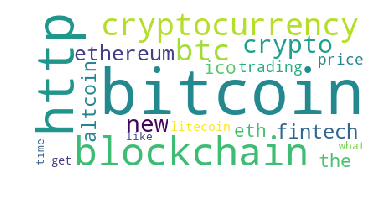

In [38]:
#Topic analysis
lda, corpus, dictionary = topic()

In [42]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [5]:
#source - https://www.cryptodatadownload.com
bitcoin = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

In [6]:
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bitcoin = bitcoin.dropna()

In [9]:
bitcoin['Timestamp'] = bitcoin['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df1['Timestamp'] = df1['date'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
df1.set_index('Timestamp', inplace=True)
bitcoin.set_index('Timestamp', inplace=True)

In [14]:
df1 = df1.sort_values('Timestamp')

In [16]:
df1.index = pd.to_datetime(df1.index)
bitcoin.index = pd.to_datetime(bitcoin.index)

In [17]:
df1.index = df1.index.values.astype('<M8[m]')
bitcoin.index = bitcoin.index.values.astype('<M8[m]')

# Calculating 2-day moving average of percent change

In [18]:
df1['30_min_prev_avg'] = np.nan
df1['30_min_next_avg'] = np.nan

In [19]:
for i in df1.index:
    start_index = i - timedelta(minutes=30)
    avg_prev  = np.mean(bitcoin[(bitcoin.index >= start_index) & (bitcoin.index <=i)]['Close'])
    df1['30_min_prev_avg'].loc[i] = avg_prev
    last_index = i+ timedelta(minutes=30)
    avg_next = np.mean(bitcoin[(bitcoin.index >= i) & (bitcoin.index <= last_index)]['Close'])
    df1['30_min_next_avg'].loc[i] = avg_next

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
df1['avg_diff'] = df1['30_min_prev_avg'] - df1['30_min_next_avg']

In [21]:
df1['pos_sent'] = np.repeat(0, len(df1))
df1['neg_sent'] = np.repeat(0, len(df1))

In [22]:
df1.head()

,Unnamed: 0,table_key,tweet_id,text,date,favorites,retweets,score,sentiment_vader,30_min_prev_avg,30_min_next_avg,avg_diff,pos_sent,neg_sent
2017-01-01 02:36:00,5221343,5353345,815386239108952066,There are 3 eras of currency: commodity based ...,1483238160,3,6,5.25,0,964.590625,963.763158,0.827467,0,0
2017-01-01 05:04:00,5219732,5351717,815423304823701504,How to begin building your Crowdify Club onlin...,1483247040,10,19,16.75,-1,963.033750,962.955000,0.078750,0,0
2017-01-01 06:32:00,5218931,5350916,815445449494724608,# Bitcoin: 2016s best-performing commodity via...,1483252320,2,5,4.25,0,964.000000,964.312000,-0.312000,0,0
2017-01-01 10:22:00,5216773,5348758,815503487798743040,# Bitcoin has been trading at a discount to it...,1483266120,12,9,9.75,0,967.626190,970.164800,-2.538610,0,0
2017-01-01 15:02:00,5212864,5344614,815574018761822209,# Bitcoin News What Will the Bitcoin Price Be ...,1483282920,17,31,27.50,0,974.837895,975.974286,-1.136391,0,0


In [23]:
for index, row in df1.iterrows():
    if row['sentiment_vader'] == 1:
        df1.set_value(index,'pos_sent',1)
    elif row['sentiment_vader'] == -1:
        df1.set_value(index,'neg_sent',1)

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df1['avg_diff'].median()

-0.8062931034486951

# OLS Regression between sentiment score and price change

In [ ]:
y = df1['avg_diff'].values.copy()
x1 = df1['pos_sent'].values.copy()
x2 = df1['neg_sent'].values.copy()
X = np.array(list(zip(x1, x2)))
model = linear_model.LinearRegression()
model.fit(X, y)

In [42]:
X = df1[['pos_sent','neg_sent','score']]
X = sm.add_constant(X)
y = df1['avg_diff']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               avg_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.056
Date:                Mon, 03 Dec 2018   Prob (F-statistic):              0.366
Time:                        22:02:36   Log-Likelihood:                -59457.
No. Observations:               10000   AIC:                         1.189e+05
Df Residuals:                    9996   BIC:                         1.190e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8496      1.317     -1.404      0.1

# Naive analysis: Check to see if sentiment score corrleates to price fluctuation

In [ ]:
for i in df1.index:
    start_index = i - timedelta(minutes=30)
    avg_prev  = np.mean(df1[(df1.index >= start_index) & (df1.index <=i)]['sentiment_vader'])
    last_index = i+ timedelta(minutes=30)
    avg_next = np.mean(df1[(df1.index >= i) & (df1.index <= last_index)]['sentiment_vader'])
    senti_change = avg_next - avg_prev
    if senti_change >= epsilon:
        df1['Predicted_price_change'] = 1
    elif 0 <= senti_change < epsilon:
        df1['Predicted_price_change'] = 0
    elif senti_change < 0:
        df1['Predicted_price_change'] = -1

In [31]:
df1['Predicted_price_change'] = np.nan

In [32]:
# Epsilon: Threshold value
epsilon = 0.5

In [35]:
for index, row in df1.iterrows():
    if row['avg_diff'] >= epsilon:
        df1.set_value(index,'Predicted_price_change',1)
    elif (-epsilon) <= row['avg_diff'] < epsilon:
        df1.set_value(index,'Predicted_price_change',0)
    elif row['avg_diff'] < (-epsilon):
        df1.set_value(index,'Predicted_price_change',-1)

/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/Users/sumeetkotaria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [37]:
accuracy = 0
for index, row in df1.iterrows():
    if row['sentiment_vader'] == row['Predicted_price_change']:
        accuracy += 1
    else:
        continue

In [38]:
# Accuracy for naive analysis
accuracy/len(df1)

0.2505